# Bài toán 1: Xây dựng mô hình dữ liệu bằng giải thuật Bayes ngây thơ trên tập dữ liệu Email Spam Detection

**Mô tả bài toán:** Sử dụng dataset Email Spam Detection từ Kaggle (https://www.kaggle.com/code/zabihullah18/email-spam-detection) để xây dựng mô hình Naive Bayes phân loại email là spam (1) hay ham (0) dựa trên nội dung text.

**Nhiệm vụ chính:**
1. Import thư viện và nạp dữ liệu.
2. Xử lý dữ liệu trước khi xây dựng mô hình.
3. Xây dựng vector hóa nội dung HAM/SPAM của tập train và test.
4. Xây dựng mô hình Naive Bayes.
5. Đánh giá hiệu quả của mô hình.

**Lưu ý:** Tải file 'spam.csv' từ Kaggle và đặt trong thư mục làm việc.

In [1]:
# Nhiệm vụ 1: Import thư viện và nạp dữ liệu vào notebook
# Importing the Necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dữ liệu từ file spam.csv (encoding='latin-1' để tránh lỗi)
data = pd.read_csv('spam.csv', encoding='latin-1')

# Display the first 5 rows
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
# Nhiệm vụ 2: Xử lý dữ liệu trước khi xây dựng mô hình từ dữ liệu
# Drop the columns with NaN values (Unnamed: 2, 3, 4)
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

# Rename columns for clarity
data.columns = ['label', 'text']

# Separate features (X) and target labels (y)
X = data.drop('label', axis=1)
y = data['label']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preprocessing done.")
print("X_train shape:", X_train.shape)
print("y_train unique:", y_train.unique())

Data preprocessing done.
X_train shape: (4457, 1)
y_train unique: ['ham' 'spam']


In [3]:
# Nhiệm vụ 3: Xây dựng vector hóa nội dung HAM/SPAM của tập train và tập test
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the training data (X_train)
X_train_vectorized = vectorizer.fit_transform(X_train['text'])

# Transform the test data (X_test)
X_test_vectorized = vectorizer.transform(X_test['text'])

print("Vectorization done.")
print("X_train_vectorized shape:", X_train_vectorized.shape)
print("X_test_vectorized shape:", X_test_vectorized.shape)

Vectorization done.
X_train_vectorized shape: (4457, 7735)
X_test_vectorized shape: (1115, 7735)


In [4]:
# Nhiệm vụ 4: Xây dựng mô hình Naïve Bayes
from sklearn.naive_bayes import MultinomialNB

# Initialize Multinomial Naive Bayes classifier
classifier = MultinomialNB()

# Train the model
classifier.fit(X_train_vectorized, y_train)

print("Naive Bayes model trained.")

Naive Bayes model trained.


Accuracy: 0.98
Confusion Matrix:
[[963   2]
 [ 16 134]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



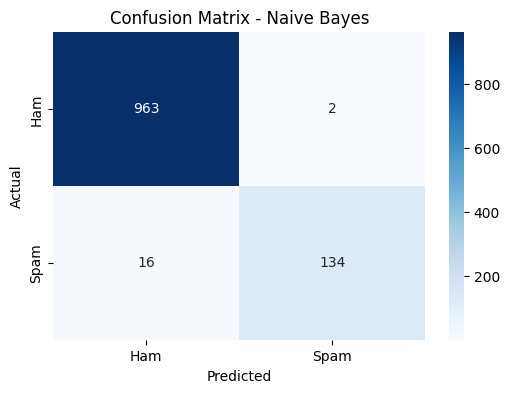

In [5]:
# Nhiệm vụ 5: Đánh giá hiệu quả của mô hình
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the test data
y_pred = classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

# Visualize Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()